# Базовые алгоритмы машинного обучения. Задача классификации.

# Метод k-ближайших соседей

## Задание

1. Разработать программу, реализующую алгоритм k-ближайших соседей для анализа выбранного набора данных.
2. Визуализировать наборы данных и работу алгоритма.
3. Построить график зависимости качества классификации от количества использующихся в алгоритме ближайших соседней.
4. Подобрать параметры алгоритма так, чтобы получить наилучшее качество на тестовых данных.

## Подключение необходимых библиотек

`%matplotlib inline` -> визуализирует графики с matplotlib прямо в jupyter notebook, а не в отдельном окне

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs

## Набор данных №1

In [2]:
X, y = make_moons(n_samples=2000, noise=0.3, random_state=0)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике

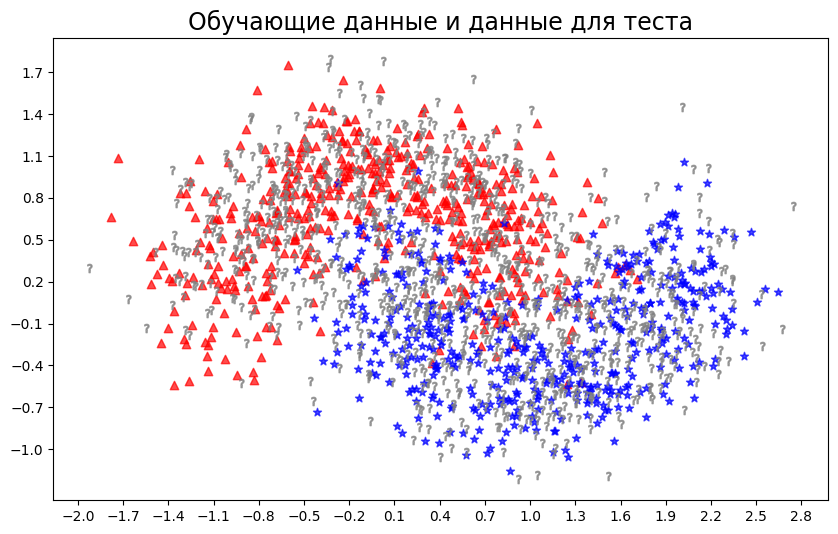

In [4]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.7)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.7)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="grey", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="grey", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-2, 3, 0.3))
ax.set_yticks(np.arange(-1, 2, 0.3))

plt.show()

### Реализуем метод k-ближайших соседей для набора данных №1

Определим с каким значением параметра `n_neighbors` метод k-ближайших соседей дает наилучший результат.<br>
n_neighbors - Number of neighbors to use by default for kneighbors queries

In [5]:
value_accuracy_score_array = []
Neighbor_min = 2
Neighbor_max = 51

for Neighbor in range (Neighbor_min, Neighbor_max):
    kNN = KNeighborsClassifier(n_neighbors=Neighbor)
    kNN.fit(x_train, y_train)
    y_pred = kNN.predict(x_test)
    value_accuracy_score = accuracy_score(y_test, y_pred)
    value_accuracy_score_array.append(value_accuracy_score)

value_accuracy_score_array = np.array(value_accuracy_score_array)

Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметра `n_neighbors` модель дает лучший результат.

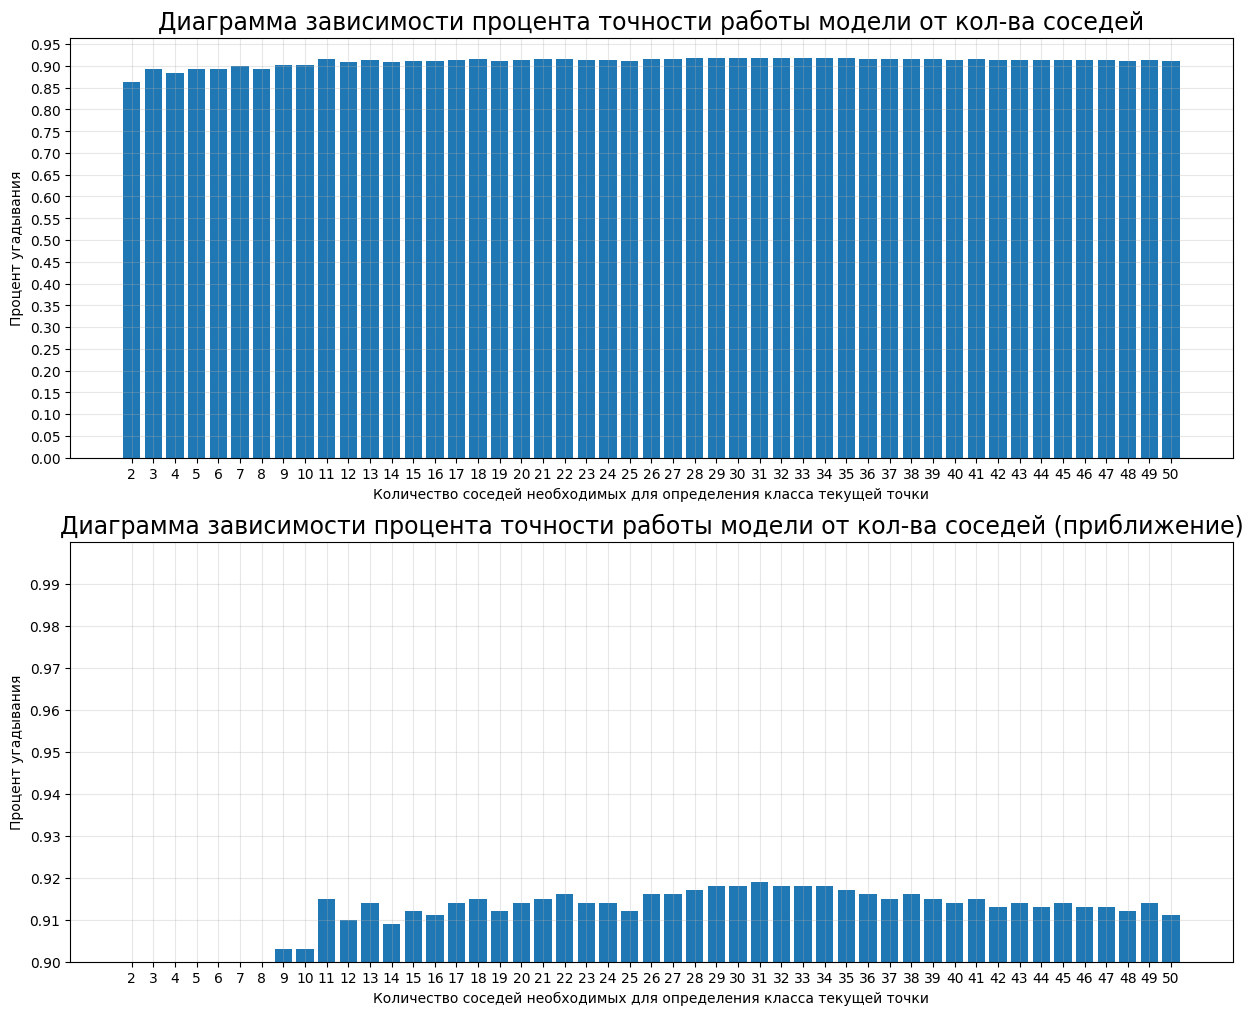

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax[0].bar(np.arange(Neighbor_min, Neighbor_max),value_accuracy_score_array)
ax[1].bar(np.arange(Neighbor_min,Neighbor_max),value_accuracy_score_array) # Приближение предыдущего графика

ax[1].set_ylim(0.9, 1)

ax[0].set_title("Диаграмма зависимости процента точности работы модели от кол-ва соседей", fontsize=17)
ax[1].set_title("Диаграмма зависимости процента точности работы модели от кол-ва соседей (приближение)",
                fontsize=17)

ax[0].set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax[0].set_ylabel("Процент угадывания") # Подписываем ось Y
ax[1].set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax[1].set_ylabel("Процент угадывания") # Подписываем ось Y

ax[0].set_xticks(np.arange(Neighbor_min,Neighbor_max))
ax[1].set_xticks(np.arange(Neighbor_min,Neighbor_max))

ax[0].set_yticks(np.arange(0, 1, 0.05))
ax[1].set_yticks(np.arange(0.9, 1, 0.01))

ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)

plt.show()

**Из полученной диаграммы видно, что наилучшее решение получится при n_neighbors=31.**

### Реализуем метод k-ближайших соседей для набора данных №1 с наилучшим значением n_neighbors

In [7]:
kNN = KNeighborsClassifier(n_neighbors=31)
kNN.fit(x_train, y_train)
y_pred = kNN.predict(x_test)

print(accuracy_score(y_test, y_pred)) 
print(kNN.score(x_test, y_test))

0.919
0.919


#### Изобразим результат работы алгоритма на графике

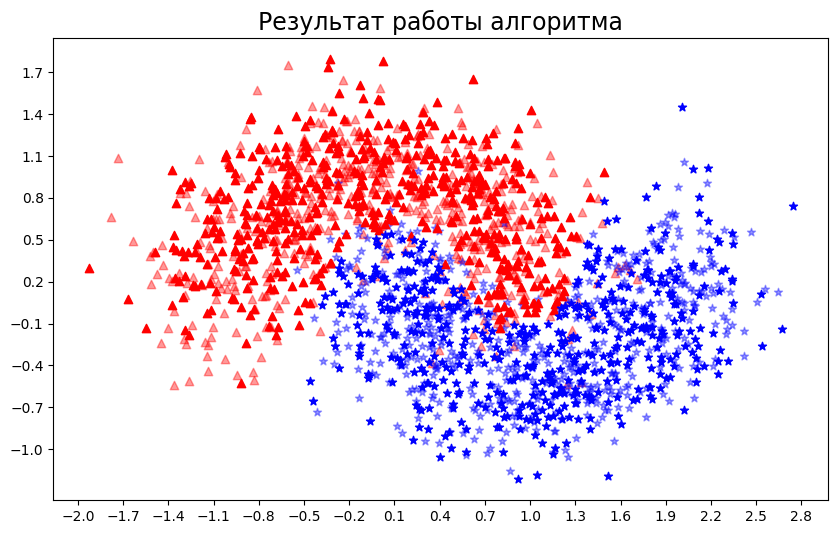

In [8]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-2, 3, 0.3))
ax.set_yticks(np.arange(-1, 2, 0.3))

plt.show()

## Набор данных №2

In [9]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, class_sep=0.4,
                           random_state=1, n_clusters_per_class=1)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике

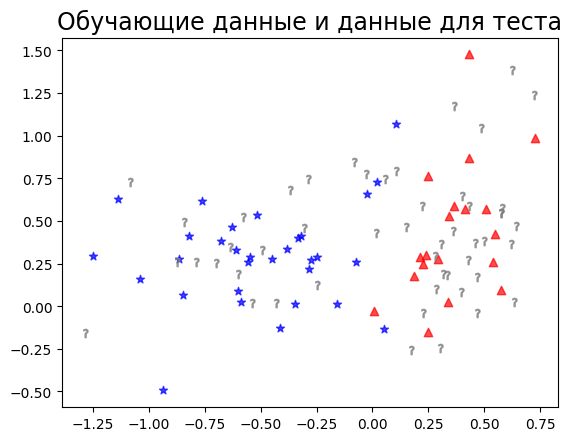

In [11]:
fig, ax = plt.subplots()

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.7)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.7)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="grey", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="grey", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-1.25, 1, 0.25))
ax.set_yticks(np.arange(-0.5, 1.75, 0.25))

plt.show()

### Реализуем метод k-ближайших соседей для набора данных №2

Определим с каким значением параметра `n_neighbors` метод k-ближайших соседей дает наилучший результат.<br>
n_neighbors - Number of neighbors to use by default for kneighbors queries

In [12]:
value_accuracy_score_array = []
Neighbor_min = 1
Neighbor_max = 16

for Neighbor in range (Neighbor_min, Neighbor_max):
    kNN = KNeighborsClassifier(n_neighbors=Neighbor)
    kNN.fit(x_train, y_train)
    y_pred = kNN.predict(x_test)
    value_accuracy_score = accuracy_score(y_test, y_pred)
    value_accuracy_score_array.append(value_accuracy_score)

value_accuracy_score_array = np.array(value_accuracy_score_array)

Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметра `n_neighbors` модель дает лучший результат.

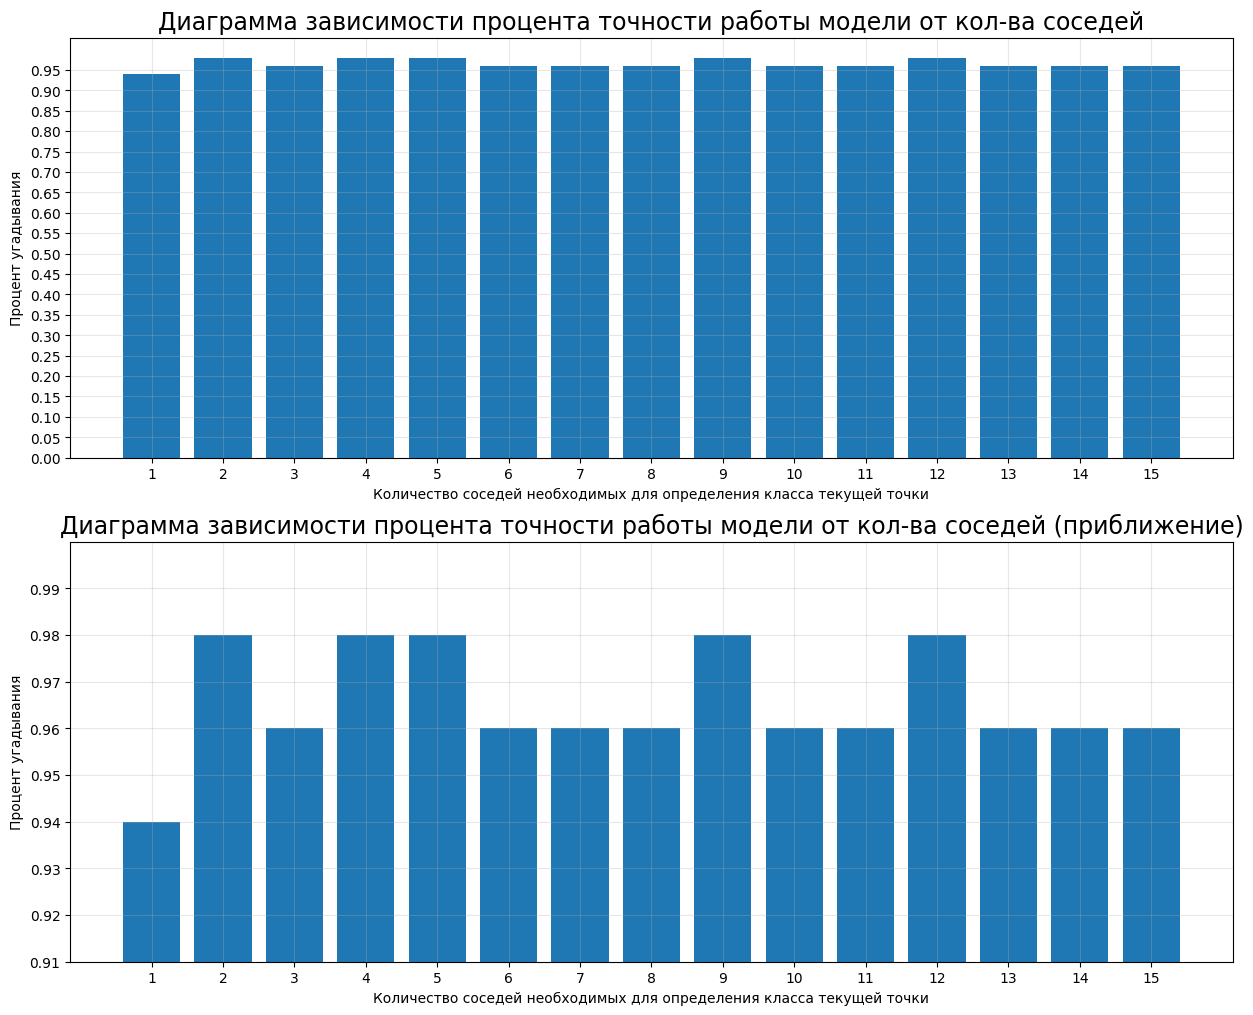

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax[0].bar(np.arange(Neighbor_min, Neighbor_max),value_accuracy_score_array)
ax[1].bar(np.arange(Neighbor_min,Neighbor_max),value_accuracy_score_array) # Приближение предыдущего графика

ax[1].set_ylim(0.91, 1)

ax[0].set_title("Диаграмма зависимости процента точности работы модели от кол-ва соседей", fontsize=17)
ax[1].set_title("Диаграмма зависимости процента точности работы модели от кол-ва соседей (приближение)",
                fontsize=17)

ax[0].set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax[0].set_ylabel("Процент угадывания") # Подписываем ось Y
ax[1].set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax[1].set_ylabel("Процент угадывания") # Подписываем ось Y

ax[0].set_xticks(np.arange(Neighbor_min,Neighbor_max))
ax[1].set_xticks(np.arange(Neighbor_min,Neighbor_max))

ax[0].set_yticks(np.arange(0, 1, 0.05))
ax[1].set_yticks(np.arange(0.91, 1, 0.01))

ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)

plt.show()

**Из полученной диаграммы видно, что наилучшее решение получится при n_neighbors=2, 4, 5, 9, 12.**<br>
Выберем наилучшее значение параметра `n_neighbors`, только на этот раз будем проверять модель с помощью кросс-валидации.

In [14]:
cv_result = []
value_score_array = []
set_Neighbor = [2,4,5,9,12]

for Neighbor in set_Neighbor:
    kNN = KNeighborsClassifier(n_neighbors=Neighbor)
    cv_result.append(cross_validate(kNN, x_train, y_train, cv=3))
    
    # Найдем среднее значение оценки точности для n_neighbors=2, 4, 5, 9, 12
    sum = 0
    for j in range(3):
        sum+=cv_result[len(cv_result)-1]['test_score'][j]
    value_score_array.append(sum/3)
    
    print("Neighbor =", Neighbor, "\t score =", cv_result[len(cv_result)-1]['test_score'], 
                                  "\t avg_score =", value_score_array[len(cv_result)-1])

Neighbor = 2 	 score = [1.         0.94117647 0.875     ] 	 avg_score = 0.9387254901960785
Neighbor = 4 	 score = [1.         0.88235294 0.8125    ] 	 avg_score = 0.8982843137254902
Neighbor = 5 	 score = [1.    1.    0.875] 	 avg_score = 0.9583333333333334
Neighbor = 9 	 score = [1.         0.94117647 0.8125    ] 	 avg_score = 0.9178921568627452
Neighbor = 12 	 score = [1.         0.88235294 0.8125    ] 	 avg_score = 0.8982843137254902


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметра `n_neighbors` модель дает лучший результат.

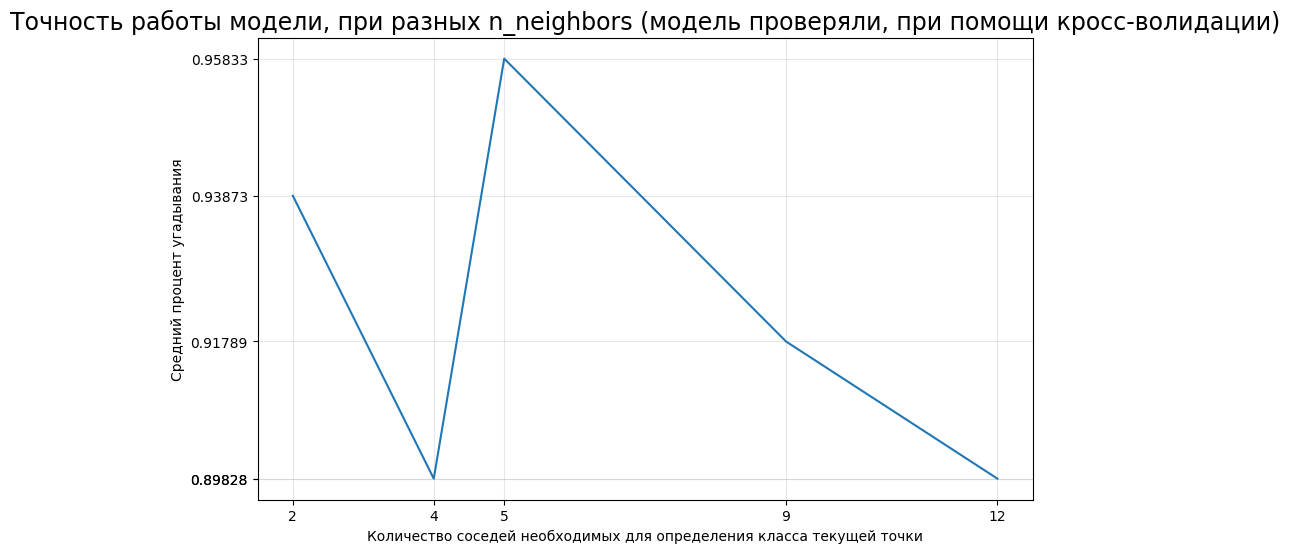

In [15]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(set_Neighbor, value_score_array)

ax.set_title("Точность работы модели, при разных n_neighbors (модель проверяли, при помощи кросс-волидации)",
                                                                                                 fontsize=17)

ax.set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(set_Neighbor)
ax.set_yticks(value_score_array)

ax.grid(alpha = 0.3)

plt.show()

**Из полученной диаграммы видно, что наилучшее решение получится при <u>n_neighbors=5</u>. Протестировав модель с помощью кросс-волидации, мы понижаем шанс переобучения модели.**

### Реализуем метод k-ближайших соседей для набора данных №2 с наилучшим значением n_neighbors

In [16]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(x_train, y_train)
y_pred = kNN.predict(x_test)

print(accuracy_score(y_test, y_pred)) 
print(kNN.score(x_test, y_test))

0.98
0.98


#### Изобразим результат работы алгоритма на графике

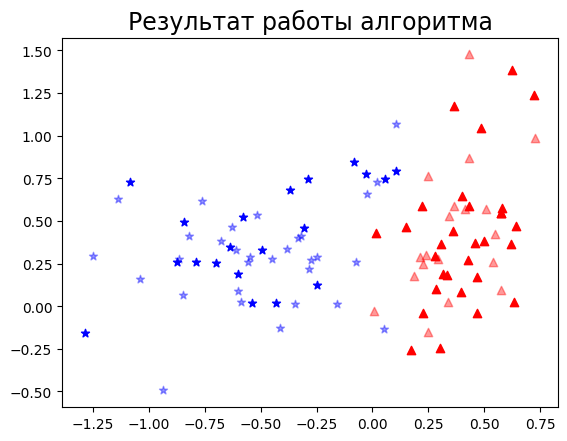

In [17]:
fig, ax = plt.subplots()

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-1.25, 1, 0.25))
ax.set_yticks(np.arange(-0.5, 1.75, 0.25))

plt.show()

## Набор данных №3

In [18]:
X, y = make_circles(n_samples=100, noise=0.2, factor=0.3, random_state=1)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике

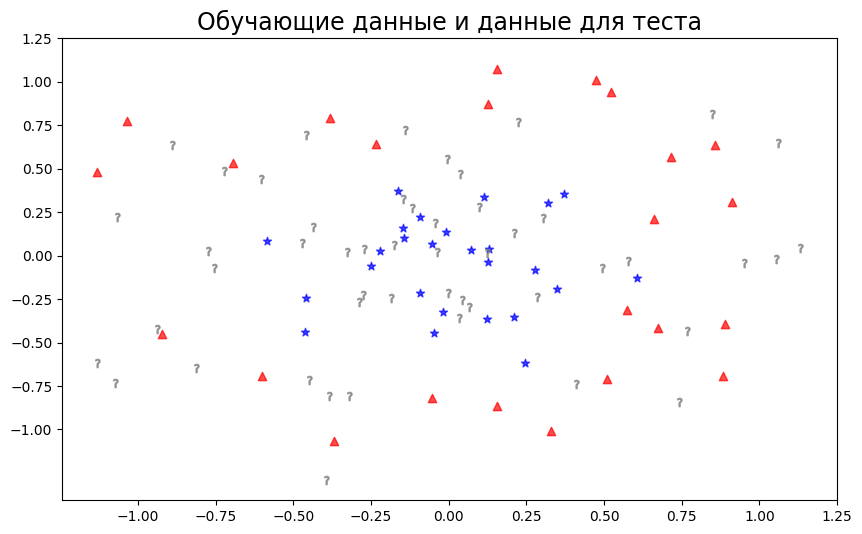

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.7)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.7)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="grey", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="grey", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-1, 1.5, 0.25))
ax.set_yticks(np.arange(-1, 1.5, 0.25))

plt.show()

### Реализуем метод k-ближайших соседей для набора данных №3

Определим с каким значением параметра `n_neighbors` метод k-ближайших соседей дает наилучший результат.<br>
n_neighbors - Number of neighbors to use by default for kneighbors queries

In [21]:
value_accuracy_score_array = []
Neighbor_min = 2
Neighbor_max = 16

for Neighbor in range (Neighbor_min, Neighbor_max):
    kNN = KNeighborsClassifier(n_neighbors=Neighbor)
    kNN.fit(x_train, y_train)
    y_pred = kNN.predict(x_test)
    value_accuracy_score = accuracy_score(y_test, y_pred)
    value_accuracy_score_array.append(value_accuracy_score)

value_accuracy_score_array = np.array(value_accuracy_score_array)

Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметра `n_neighbors` модель дает лучший результат.

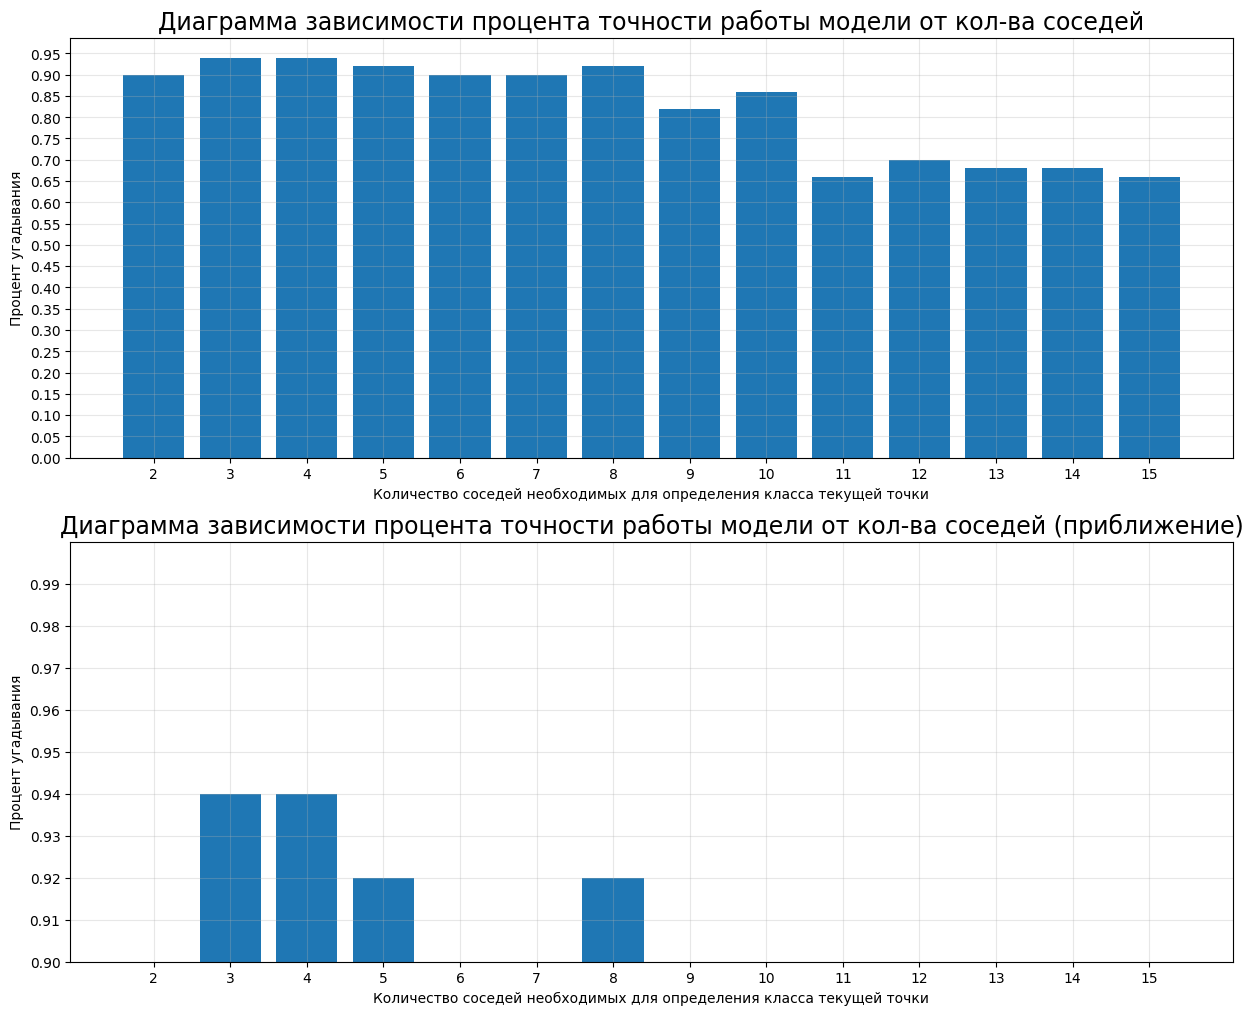

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax[0].bar(np.arange(Neighbor_min, Neighbor_max),value_accuracy_score_array)
ax[1].bar(np.arange(Neighbor_min,Neighbor_max),value_accuracy_score_array) # Приближение предыдущего графика

ax[1].set_ylim(0.9, 1)

ax[0].set_title("Диаграмма зависимости процента точности работы модели от кол-ва соседей", fontsize=17)
ax[1].set_title("Диаграмма зависимости процента точности работы модели от кол-ва соседей (приближение)",
                fontsize=17)

ax[0].set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax[0].set_ylabel("Процент угадывания") # Подписываем ось Y
ax[1].set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax[1].set_ylabel("Процент угадывания") # Подписываем ось Y

ax[0].set_xticks(np.arange(Neighbor_min,Neighbor_max))
ax[1].set_xticks(np.arange(Neighbor_min,Neighbor_max))

ax[0].set_yticks(np.arange(0, 1, 0.05))
ax[1].set_yticks(np.arange(0.9, 1, 0.01))

ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)

plt.show()

**Из полученной диаграммы видно, что наилучшее решение получится при n_neighbors=3, 4.** Возьмем для теста еще параметры n_neighbors=5, 8.<br>
Выберем наилучшее значение параметра `n_neighbors`, только на этот раз будем проверять модель с помощью кросс-валидации.

In [23]:
cv_result = []
value_score_array = []
set_Neighbor = [3,4,5,8]

for Neighbor in set_Neighbor:
    kNN = KNeighborsClassifier(n_neighbors=Neighbor)
    cv_result.append(cross_validate(kNN, x_train, y_train, cv=3))
    
    # Найдем среднее значение оценки точности для n_neighbors=3, 4, 5, 8
    sum = 0
    for j in range(3):
        sum+=cv_result[len(cv_result)-1]['test_score'][j]
    value_score_array.append(sum/3)
    
    print("Neighbor =", Neighbor, "\t score =", cv_result[len(cv_result)-1]['test_score'], 
                                  "\t avg_score =", value_score_array[len(cv_result)-1])

Neighbor = 3 	 score = [0.88235294 0.88235294 0.9375    ] 	 avg_score = 0.9007352941176471
Neighbor = 4 	 score = [0.88235294 0.88235294 0.9375    ] 	 avg_score = 0.9007352941176471
Neighbor = 5 	 score = [0.82352941 0.82352941 0.9375    ] 	 avg_score = 0.8615196078431372
Neighbor = 8 	 score = [0.82352941 0.82352941 0.875     ] 	 avg_score = 0.8406862745098039


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметра `n_neighbors` модель дает лучший результат.

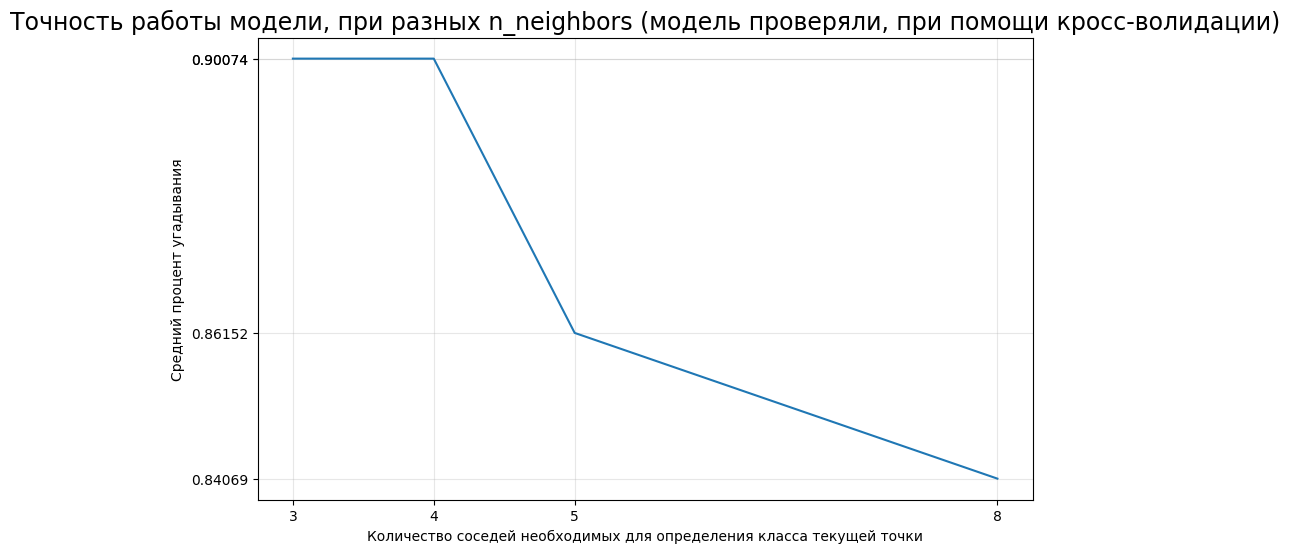

In [24]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(set_Neighbor, value_score_array)

ax.set_title("Точность работы модели, при разных n_neighbors (модель проверяли, при помощи кросс-волидации)",
             fontsize=17)

ax.set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(set_Neighbor)
ax.set_yticks(value_score_array)

ax.grid(alpha = 0.3)

plt.show()

**Из полученной диаграммы видно, что наилучшее решение получится при <u>n_neighbors=3</u> или <u>n_neighbors=4</u>. Протестировав модель с помощью кросс-волидации, мы понижаем шанс переобучения модели.**<br>
Примем n_neighbors за 3 и запустип алгоритм, результат работы изобразим на графике.

### Реализуем метод k-ближайших соседей для набора данных №3 с наилучшим значением n_neighbors

In [25]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(x_train, y_train)
y_pred = kNN.predict(x_test)

print(accuracy_score(y_test, y_pred)) 
print(kNN.score(x_test, y_test))

0.94
0.94


#### Изобразим результат работы алгоритма на графике

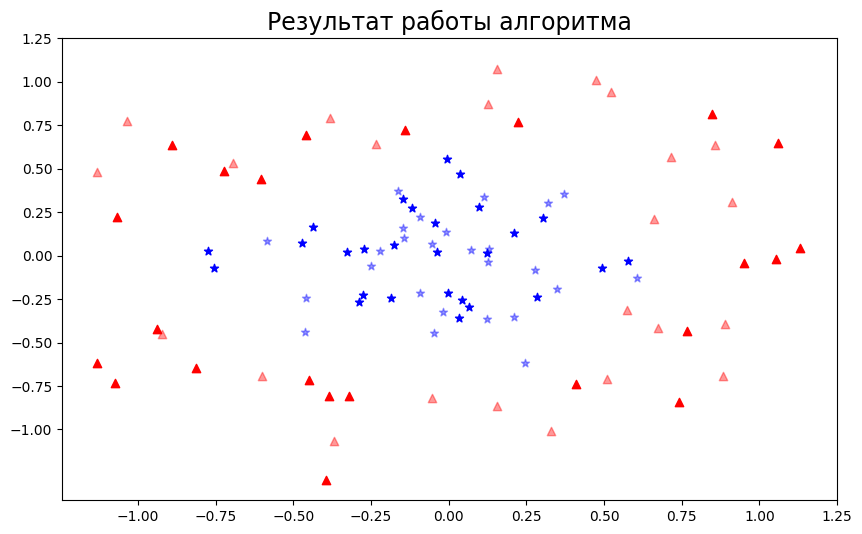

In [26]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-1, 1.5, 0.25))
ax.set_yticks(np.arange(-1, 1.5, 0.25))

plt.show()

## Набор данных №4

In [27]:
X, y = make_blobs(n_samples=100, centers=[[4, 4], [-4, -4]], cluster_std=2, random_state=0)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X= np.dot(X, transformation)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике

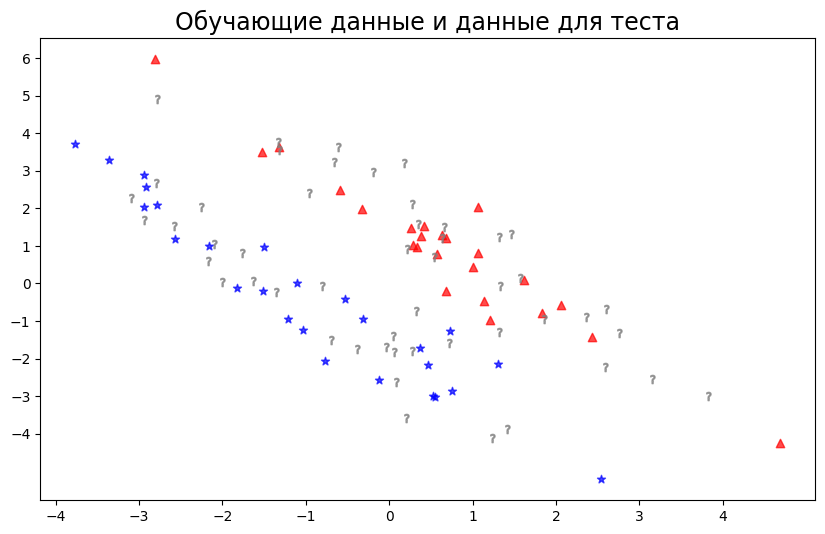

In [29]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.7)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.7)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="grey", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="grey", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 7, 1))

plt.show()

### Реализуем метод k-ближайших соседей для набора данных №4

Определим с каким значением параметра `n_neighbors` метод k-ближайших соседей дает наилучший результат.<br>
n_neighbors - Number of neighbors to use by default for kneighbors queries

In [30]:
value_accuracy_score_array = []
Neighbor_min = 2
Neighbor_max = 16

for Neighbor in range (Neighbor_min, Neighbor_max):
    kNN = KNeighborsClassifier(n_neighbors=Neighbor)
    kNN.fit(x_train, y_train)
    y_pred = kNN.predict(x_test)
    value_accuracy_score = accuracy_score(y_test, y_pred)
    value_accuracy_score_array.append(value_accuracy_score)

value_accuracy_score_array = np.array(value_accuracy_score_array)

Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметра `n_neighbors` модель дает лучший результат.

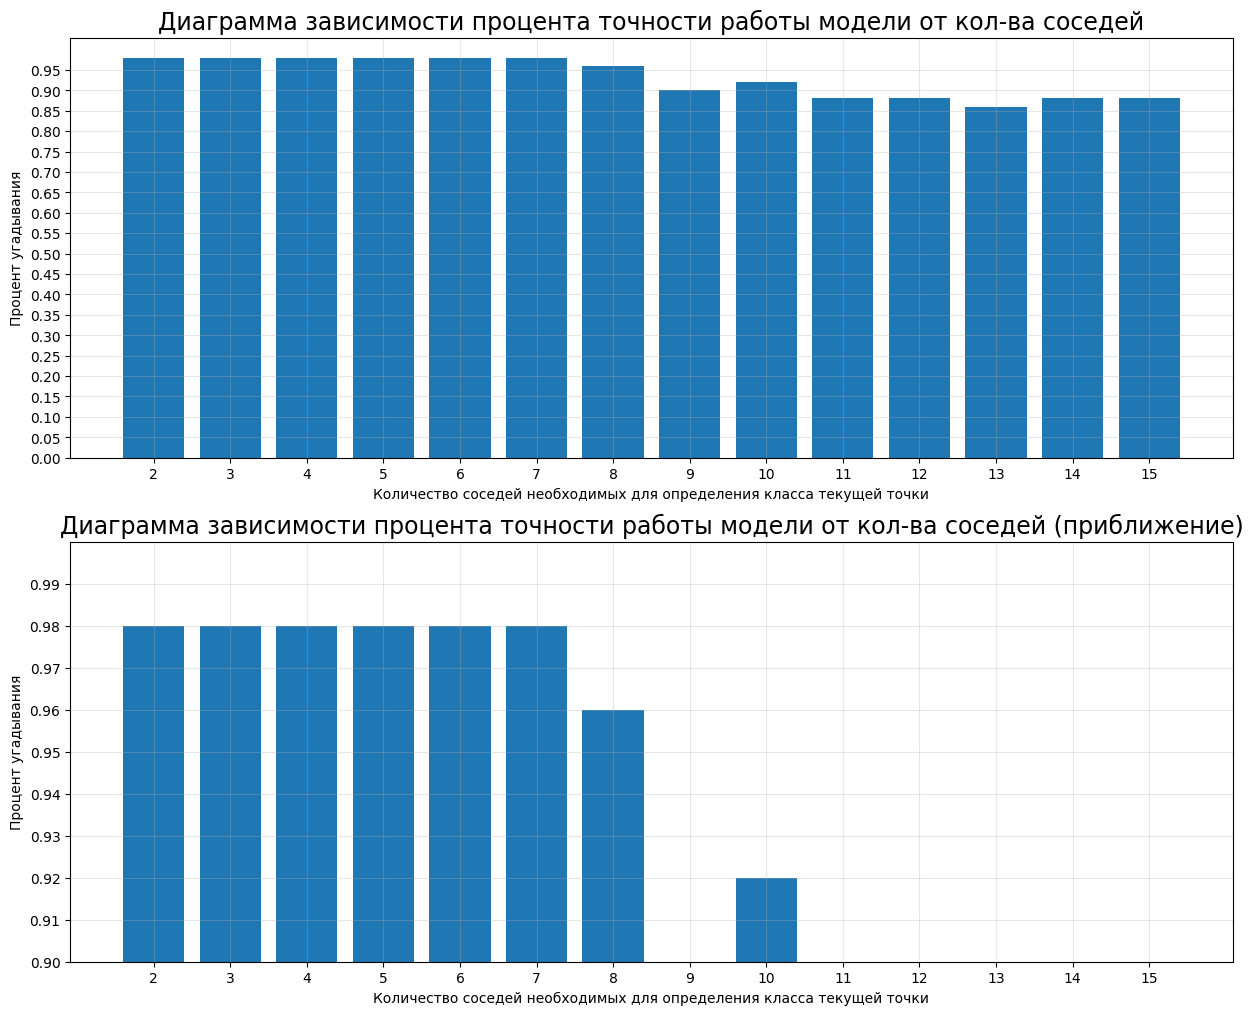

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax[0].bar(np.arange(Neighbor_min, Neighbor_max),value_accuracy_score_array)
ax[1].bar(np.arange(Neighbor_min,Neighbor_max),value_accuracy_score_array) # Приближение предыдущего графика

ax[1].set_ylim(0.9, 1)

ax[0].set_title("Диаграмма зависимости процента точности работы модели от кол-ва соседей", fontsize=17)
ax[1].set_title("Диаграмма зависимости процента точности работы модели от кол-ва соседей (приближение)",
                fontsize=17)

ax[0].set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax[0].set_ylabel("Процент угадывания") # Подписываем ось Y
ax[1].set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax[1].set_ylabel("Процент угадывания") # Подписываем ось Y

ax[0].set_xticks(np.arange(Neighbor_min,Neighbor_max))
ax[1].set_xticks(np.arange(Neighbor_min,Neighbor_max))

ax[0].set_yticks(np.arange(0, 1, 0.05))
ax[1].set_yticks(np.arange(0.9, 1, 0.01))

ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)

plt.show()

**Из полученной диаграммы видно, что наилучшее решение получится при n_neighbors=2, 3, 4, 5, 6, 7.**<br>
Выберем наилучшее значение параметра `n_neighbors`, только на этот раз будем проверять модель с помощью кросс-валидации.

In [32]:
cv_result = []
value_score_array = []
set_Neighbor = [2,3,4,5,6,7]

for Neighbor in set_Neighbor:
    kNN = KNeighborsClassifier(n_neighbors=Neighbor)
    cv_result.append(cross_validate(kNN, x_train, y_train, cv=3))
    
    # Найдем среднее значение оценки точности для n_neighbors=3, 4, 5, 8
    sum = 0
    for j in range(3):
        sum+=cv_result[len(cv_result)-1]['test_score'][j]
    value_score_array.append(sum/3)
    
    print("Neighbor =", Neighbor, "\t score =", cv_result[len(cv_result)-1]['test_score'], 
                                  "\t avg_score =", value_score_array[len(cv_result)-1])

Neighbor = 2 	 score = [1.         0.88235294 0.9375    ] 	 avg_score = 0.9399509803921569
Neighbor = 3 	 score = [0.94117647 1.         0.875     ] 	 avg_score = 0.9387254901960785
Neighbor = 4 	 score = [0.94117647 1.         0.9375    ] 	 avg_score = 0.9595588235294118
Neighbor = 5 	 score = [0.88235294 1.         0.875     ] 	 avg_score = 0.9191176470588235
Neighbor = 6 	 score = [0.88235294 0.94117647 0.875     ] 	 avg_score = 0.8995098039215685
Neighbor = 7 	 score = [0.88235294 1.         0.875     ] 	 avg_score = 0.9191176470588235


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметра `n_neighbors` модель дает лучший результат.

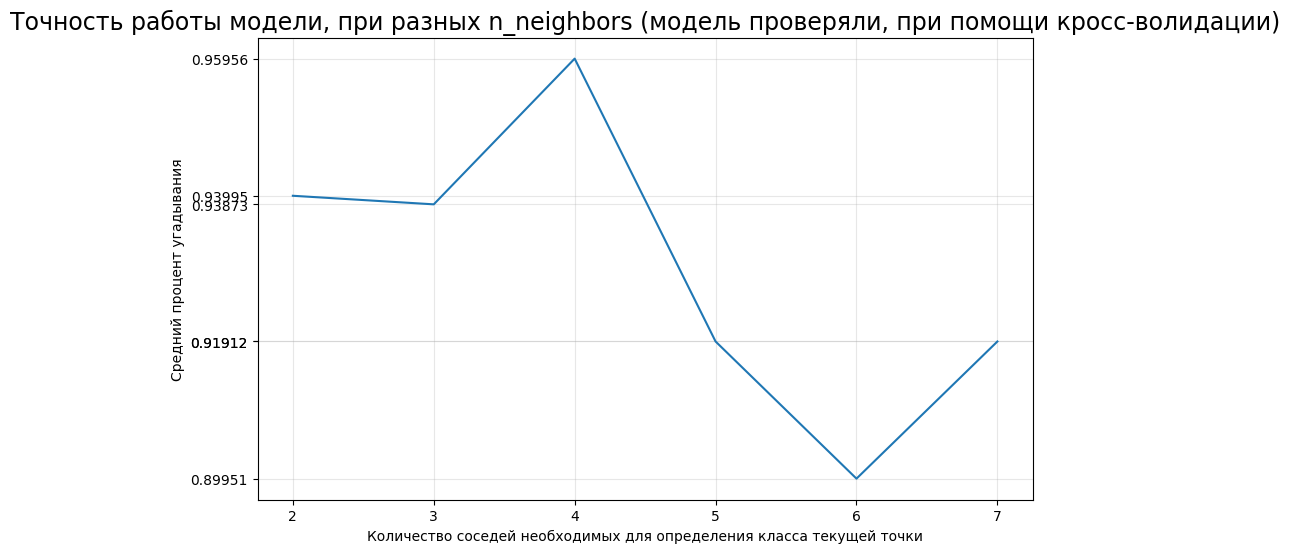

In [33]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(set_Neighbor, value_score_array)

ax.set_title("Точность работы модели, при разных n_neighbors (модель проверяли, при помощи кросс-волидации)",
             fontsize=17)

ax.set_xlabel("Количество соседей необходимых для определения класса текущей точки") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(set_Neighbor)
ax.set_yticks(value_score_array)

ax.grid(alpha = 0.3)

plt.show()

**Из полученной диаграммы видно, что наилучшее решение получится при <u>n_neighbors=4</u>. Протестировав модель с помощью кросс-волидации, мы понижаем шанс переобучения модели.**

### Реализуем метод k-ближайших соседей для набора данных №4 с наилучшим значением n_neighbors

In [34]:
kNN = KNeighborsClassifier(n_neighbors=4)
kNN.fit(x_train, y_train)
y_pred = kNN.predict(x_test)

print(accuracy_score(y_test, y_pred)) 
print(kNN.score(x_test, y_test))

0.98
0.98


#### Изобразим результат работы алгоритма на графике

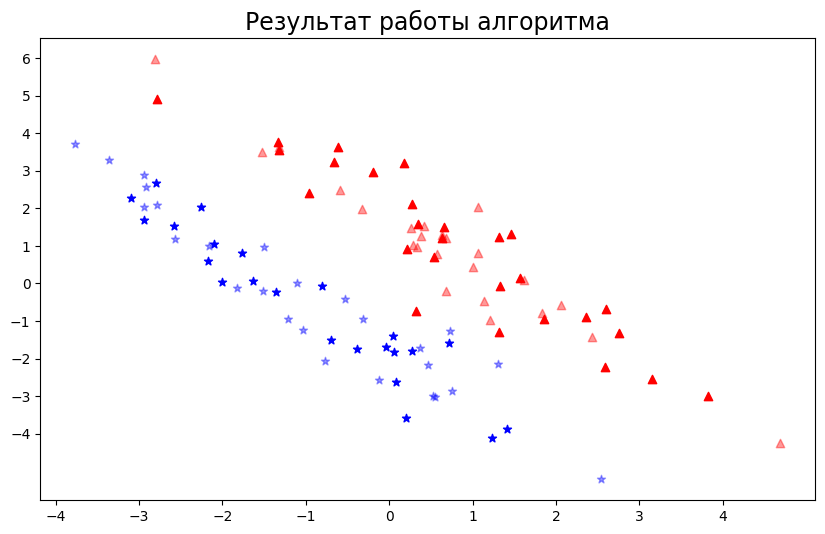

In [35]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 7, 1))

plt.show()